In [1]:
import pandas as pd
import numpy as np

In [2]:
# choose any n consecutive datasets
input_dataset = pd.read_csv("datasets/input.csv")
year = int(input_dataset['season'].iloc[0])
if year > 2015:
    year = 2015
n = 3
year -= n
df = None
for i in range(n + 1):
    dataset_year = pd.read_csv("datasets/matchups-" + str(year + i) + ".csv")
    df = pd.concat([df, dataset_year])

print(df.shape)


(103621, 53)


In [3]:
# Veiwing the data
df.head()

,game,season,home_team,away_team,starting_min,end_min,home_0,home_1,home_2,home_3,...,pf_visitor,reb_visitor,dreb_visitor,oreb_visitor,to_visitor,pts_visitor,pct_visitor,pct_2_visitor,pct_3_visitor,outcome
0,201112260DAL,2012,DAL,DEN,0,5,Brendan Haywood,Delonte West,Dirk Nowitzki,Jason Kidd,...,0,8,6,2,2,9,0.363636,0.375000,0.333333,1
1,201112260DAL,2012,DAL,DEN,6,6,Brendan Haywood,Delonte West,Dirk Nowitzki,Jason Terry,...,0,1,1,0,0,5,1.000000,1.000000,1.000000,-1
2,201112260DAL,2012,DAL,DEN,7,8,Brendan Haywood,Delonte West,Dirk Nowitzki,Jason Terry,...,0,4,3,1,1,4,0.500000,0.666667,0.000000,-1
3,201112260DAL,2012,DAL,DEN,9,10,Brendan Haywood,Delonte West,Jason Terry,Lamar Odom,...,0,2,2,0,0,4,0.500000,0.666667,0.000000,-1
4,201112260DAL,2012,DAL,DEN,11,11,Delonte West,Ian Mahinmi,Jason Terry,Lamar Odom,...,0,1,1,0,0,6,1.000000,0.000000,1.000000,-1


In [4]:
# Analysing the information of of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103621 entries, 0 to 28767
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   game           103621 non-null  object 
 1   season         103621 non-null  int64  
 2   home_team      103621 non-null  object 
 3   away_team      103621 non-null  object 
 4   starting_min   103621 non-null  int64  
 5   end_min        103621 non-null  int64  
 6   home_0         103621 non-null  object 
 7   home_1         103621 non-null  object 
 8   home_2         103621 non-null  object 
 9   home_3         103621 non-null  object 
 10  home_4         103621 non-null  object 
 11  away_0         103621 non-null  object 
 12  away_1         103621 non-null  object 
 13  away_2         103621 non-null  object 
 14  away_3         103621 non-null  object 
 15  away_4         103621 non-null  object 
 16  fga_home       103621 non-null  int64  
 17  fta_home       103621 non-null  int

In [5]:
# Checking the sum of null values in each column of the dataframe. Here the data has no missing values. It is complete.
df.isnull().sum()

game             0
season           0
home_team        0
away_team        0
starting_min     0
end_min          0
home_0           0
home_1           0
home_2           0
home_3           0
home_4           0
away_0           0
away_1           0
away_2           0
away_3           0
away_4           0
fga_home         0
fta_home         0
fgm_home         0
fga_2_home       0
fgm_2_home       0
fga_3_home       0
fgm_3_home       0
ast_home         0
blk_home         0
pf_home          0
reb_home         0
dreb_home        0
oreb_home        0
to_home          0
pts_home         0
pct_home         0
pct_2_home       0
pct_3_home       0
fga_visitor      0
fta_visitor      0
fgm_visitor      0
fga_2_visitor    0
fgm_2_visitor    0
fga_3_visitor    0
fgm_3_visitor    0
ast_visitor      0
blk_visitor      0
pf_visitor       0
reb_visitor      0
dreb_visitor     0
oreb_visitor     0
to_visitor       0
pts_visitor      0
pct_visitor      0
pct_2_visitor    0
pct_3_visitor    0
outcome     

In [6]:
# Checking the names of the columns.
df.columns

Index(['game', 'season', 'home_team', 'away_team', 'starting_min', 'end_min',
       'home_0', 'home_1', 'home_2', 'home_3', 'home_4', 'away_0', 'away_1',
       'away_2', 'away_3', 'away_4', 'fga_home', 'fta_home', 'fgm_home',
       'fga_2_home', 'fgm_2_home', 'fga_3_home', 'fgm_3_home', 'ast_home',
       'blk_home', 'pf_home', 'reb_home', 'dreb_home', 'oreb_home', 'to_home',
       'pts_home', 'pct_home', 'pct_2_home', 'pct_3_home', 'fga_visitor',
       'fta_visitor', 'fgm_visitor', 'fga_2_visitor', 'fgm_2_visitor',
       'fga_3_visitor', 'fgm_3_visitor', 'ast_visitor', 'blk_visitor',
       'pf_visitor', 'reb_visitor', 'dreb_visitor', 'oreb_visitor',
       'to_visitor', 'pts_visitor', 'pct_visitor', 'pct_2_visitor',
       'pct_3_visitor', 'outcome'],
      dtype='object')

# Data preprocessing

Checking class imbalance

In [7]:
class_distribution = df['outcome'].value_counts()
print(class_distribution)

outcome
-1    63332
 1    40289
Name: count, dtype: int64


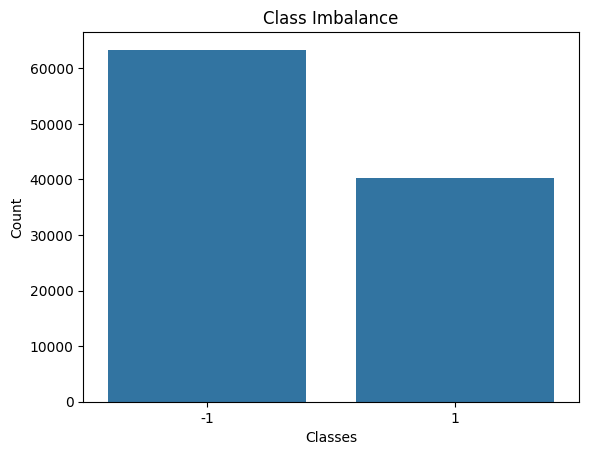

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ploting the class imbalance to analyse the target variable.
sns.countplot(x='outcome', data=df)
plt.title('Class Imbalance')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

Here the class with 1 is minority since the number of observations belonging to that class are almost half as compared to the other class. Hence to overcome this imbalance we are upsampling the minority class in a way that we do not lose any information.

In [9]:
from sklearn.utils import resample

# Separating the minority and majority class samples.
df_majority = df[df.outcome == -1]
df_minority = df[df.outcome == 1]

# Upsampling minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # sampling with replacement
                                 n_samples=len(df_majority),  # matching majority n
                                 random_state=42)  # reproducible results
df=pd.concat([df_majority, df_minority_upsampled]) #Redefining the dataframe with the upsampled data

In [10]:
# Checking the imbalance of the class again.
class_distribution = df['outcome'].value_counts()
print(class_distribution)

outcome
-1    63332
 1    63332
Name: count, dtype: int64


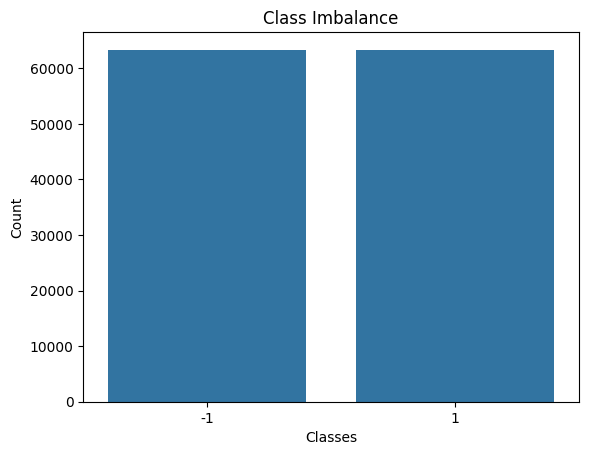

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ploting class imbalance
sns.countplot(x='outcome', data=df)
plt.title('Class Imbalance')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

In [12]:
df.columns

Index(['game', 'season', 'home_team', 'away_team', 'starting_min', 'end_min',
       'home_0', 'home_1', 'home_2', 'home_3', 'home_4', 'away_0', 'away_1',
       'away_2', 'away_3', 'away_4', 'fga_home', 'fta_home', 'fgm_home',
       'fga_2_home', 'fgm_2_home', 'fga_3_home', 'fgm_3_home', 'ast_home',
       'blk_home', 'pf_home', 'reb_home', 'dreb_home', 'oreb_home', 'to_home',
       'pts_home', 'pct_home', 'pct_2_home', 'pct_3_home', 'fga_visitor',
       'fta_visitor', 'fgm_visitor', 'fga_2_visitor', 'fgm_2_visitor',
       'fga_3_visitor', 'fgm_3_visitor', 'ast_visitor', 'blk_visitor',
       'pf_visitor', 'reb_visitor', 'dreb_visitor', 'oreb_visitor',
       'to_visitor', 'pts_visitor', 'pct_visitor', 'pct_2_visitor',
       'pct_3_visitor', 'outcome'],
      dtype='object')

Hence our data is balanced now


# Data Transformation

Now encoding the player names since the machine doesnt undertand the textual data.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Here we are abstracting all the unique home players from all the home columns.
player_columns = ['home_0', 'home_1', 'home_2', 'home_3', 'home_4', 'away_0', 'away_1', 'away_2', 'away_3', 'away_4']

# Combining all the players
all_players = df[player_columns].values.flatten()

# Initializing and fitting the label encoder
encoder = LabelEncoder()
encoder.fit(all_players)

# Encoding player names in the dataset
for col in player_columns:
    df.loc[:, col] = encoder.transform(df[col])

In [14]:
# Get the mapping of player names to numbers
player_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Player Name Mapping:")
print(player_name_mapping)


Player Name Mapping:
{'A.J. Price': np.int64(0), 'Aaron Brooks': np.int64(1), 'Aaron Gordon': np.int64(2), 'Aaron Gray': np.int64(3), 'Adonis Thomas': np.int64(4), 'Adreian Payne': np.int64(5), 'Al Harrington': np.int64(6), 'Al Horford': np.int64(7), 'Al Jefferson': np.int64(8), 'Al-Farouq Aminu': np.int64(9), 'Alan Anderson': np.int64(10), 'Alec Burks': np.int64(11), 'Alex Kirk': np.int64(12), 'Alex Len': np.int64(13), 'Alexey Shved': np.int64(14), 'Alexis Ajinca': np.int64(15), 'Allen Crabbe': np.int64(16), 'Alonzo Gee': np.int64(17), "Amar'e Stoudemire": np.int64(18), 'Amir Johnson': np.int64(19), 'Anderson Varejao': np.int64(20), 'Andray Blatche': np.int64(21), 'Andre Dawkins': np.int64(22), 'Andre Drummond': np.int64(23), 'Andre Emmett': np.int64(24), 'Andre Iguodala': np.int64(25), 'Andre Miller': np.int64(26), 'Andre Roberson': np.int64(27), 'Andrea Bargnani': np.int64(28), 'Andrei Kirilenko': np.int64(29), 'Andres Nocioni': np.int64(30), 'Andrew Bogut': np.int64(31), 'Andrew By

In [15]:
# Determining the number of unique players across all the seasons.
player_vocab_size = len(encoder.classes_)
print("Player vocabulary size:", player_vocab_size)


Player vocabulary size: 733


# Feature Engineering

In [16]:
# Converting class labels from -1 to 0 and 1 to 1
df['outcome']=(df['outcome']+1)/2

Based on the research conducted on how to understand the NBA game and statistics, there were four main factors that will decide if a team wins and losses. They encompass the important statistics of the team’s performance which are defined by the following four factors.
The factor formulas are:
•	Shooting the ball
Effective Field Goal Percentage= (Field Goals Made) + 0.5*3P Field Goals Made))/(Field Goal Attempts)
•	Taking care of the ball
Turnover Rate=Turnovers/ (Field Goal Attempts + 0.44*Free Throw Attempts + Turnovers)
•	Offensive rebounding
Offensive Rebounding Percentage = (Offensive Rebounds)/ [(Offensive Rebounds) +(Opponent’s Defensive Rebounds)]
•	Getting to the foul line
Free Throw Rate= (Free Throws Made)/(Field Goals Attempted) or Free Throws Attempted/Field Goals Attempted

Thus utilizing the data available to calculate the above factors for home and away lineups.

In [17]:
#This metric adds extra weight to three-point attempts (since they are more valuable) and divides by the total field goal attempts to measure scoring efficiency.
df['home_field_goal_efficiency']=(df['fgm_home']+(0.5*df['fga_3_home']))/df['fga_home']
#Measures how often the home team turns the ball over per field goal attempt, adjusting for free throw attempts (which contribute to possessions but not as much as regular shots).
df['home_turnover_precentage']=df['to_home']/(df['fga_home']+(0.44*df['fta_home']))
#Measures how often the home team secures an offensive rebound when there's a rebounding opportunity (total offensive rebounds / total available rebounds on offense).
df['home_offensive_rebound_percentage']=df['oreb_home']/(df['oreb_home']+df['dreb_visitor'])
#Measures how frequently the home team gets to the free-throw line relative to the number of shots made.
df['home_free_throw_rate']=df['fta_home']/df['fgm_home']

In [18]:
df['visitor_field_goal_efficiency']=(df['fgm_visitor']+(0.5*df['fga_3_visitor']))/df['fga_visitor']
df['visitor_turnover_precentage']=df['to_visitor']/(df['fga_visitor']+(0.44*df['fta_visitor']))
df['visitor_offensive_rebound_percentage']=df['oreb_visitor']/(df['oreb_visitor']+df['dreb_home'])
df['visitor_free_throw_rate']=df['fta_visitor']/df['fgm_visitor']

In [19]:
# Dropping the unncessary columns
df.drop(['game', 'starting_min', 'end_min',
      'fga_home', 'fta_home', 'fgm_home',
       'fga_2_home', 'fgm_2_home', 'fga_3_home', 'fgm_3_home', 'ast_home',
       'blk_home', 'pf_home', 'reb_home', 'dreb_home', 'oreb_home', 'to_home',
       'pts_home', 'pct_home', 'pct_2_home', 'pct_3_home', 'fga_visitor',
       'fta_visitor', 'fgm_visitor', 'fga_2_visitor', 'fgm_2_visitor',
       'fga_3_visitor', 'fgm_3_visitor', 'ast_visitor', 'blk_visitor',
       'pf_visitor', 'reb_visitor', 'dreb_visitor', 'oreb_visitor',
       'to_visitor', 'pts_visitor', 'pct_visitor', 'pct_2_visitor',
       'pct_3_visitor'],inplace=True,axis=1)

In [20]:
df.columns

Index(['season', 'home_team', 'away_team', 'home_0', 'home_1', 'home_2',
       'home_3', 'home_4', 'away_0', 'away_1', 'away_2', 'away_3', 'away_4',
       'outcome', 'home_field_goal_efficiency', 'home_turnover_precentage',
       'home_offensive_rebound_percentage', 'home_free_throw_rate',
       'visitor_field_goal_efficiency', 'visitor_turnover_precentage',
       'visitor_offensive_rebound_percentage', 'visitor_free_throw_rate'],
      dtype='object')

In [21]:
df.head()

,season,home_team,away_team,home_0,home_1,home_2,home_3,home_4,away_0,away_1,...,away_4,outcome,home_field_goal_efficiency,home_turnover_precentage,home_offensive_rebound_percentage,home_free_throw_rate,visitor_field_goal_efficiency,visitor_turnover_precentage,visitor_offensive_rebound_percentage,visitor_free_throw_rate
1,2012,DAL,DEN,77,175,193,329,712,50,149,...,696,0.0,0.750000,0.000000,0.0,0.0,1.250000,0.00,NaN,0.0
2,2012,DAL,DEN,77,175,193,329,712,26,149,...,696,0.0,0.375000,0.000000,0.0,0.0,0.625000,0.25,0.50,0.0
3,2012,DAL,DEN,77,175,329,444,712,6,26,...,696,0.0,0.500000,0.333333,0.0,0.0,0.625000,0.00,0.00,1.0
4,2012,DAL,DEN,175,278,329,444,712,6,26,...,607,0.0,0.750000,0.000000,0.0,0.0,1.500000,0.00,NaN,0.0
5,2012,DAL,DEN,193,329,444,599,639,6,26,...,607,0.0,0.916667,0.155280,0.0,0.2,0.555556,0.00,0.75,0.0


In [22]:
# Analysing the percentage of null values in the columns.

null_counts = df.isnull().sum()

# Calculating the total number of rows in the DataFrame
total_rows = len(df)

# Calculating the percentage of null values for each column
null_percentage = (null_counts / total_rows) * 100

print("Percentage of null values for each column:")
print(null_percentage)

Percentage of null values for each column:
season                                   0.000000
home_team                                0.000000
away_team                                0.000000
home_0                                   0.000000
home_1                                   0.000000
home_2                                   0.000000
home_3                                   0.000000
home_4                                   0.000000
away_0                                   0.000000
away_1                                   0.000000
away_2                                   0.000000
away_3                                   0.000000
away_4                                   0.000000
outcome                                  0.000000
home_field_goal_efficiency               7.014621
home_turnover_precentage                 4.038243
home_offensive_rebound_percentage       21.523874
home_free_throw_rate                    15.186636
visitor_field_goal_efficiency            8.216226
visitor

In [23]:
# Here the percentage of null values is quite low which can be replaced by the 0.
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0,inplace=True)

C:\Users\sahil\AppData\Local\Temp\ipykernel_28284\1764049549.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [24]:
# Analysing the statistics of each column in the dataframe.
df.describe()

,season,home_0,home_1,home_2,home_3,home_4,away_0,away_1,away_2,away_3,away_4,outcome,home_field_goal_efficiency,home_turnover_precentage,home_offensive_rebound_percentage,home_free_throw_rate,visitor_field_goal_efficiency,visitor_turnover_precentage,visitor_offensive_rebound_percentage,visitor_free_throw_rate
count,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000,126664.000000
mean,2013.616324,122.115818,249.352334,372.353123,493.018490,612.632690,122.876484,248.418414,369.561564,490.932712,612.636558,0.500000,0.595165,0.181370,0.257942,0.440413,0.509090,0.209368,0.244810,0.437929
std,1.093145,109.050251,132.379498,136.496576,126.418957,100.406643,109.191359,132.393973,136.089222,125.956028,99.548192,0.500002,0.371023,0.339290,0.337141,0.898542,0.366553,0.371302,0.322522,0.933822
min,2012.000000,0.000000,10.000000,19.000000,41.000000,52.000000,0.000000,10.000000,19.000000,41.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,38.000000,152.000000,269.000000,418.000000,562.000000,40.000000,151.000000,264.000000,416.000000,561.000000,0.000000,0.357143,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
50%,2014.000000,92.000000,235.000000,374.000000,505.000000,643.000000,94.000000,235.000000,372.000000,502.000000,643.000000,0.500000,0.590909,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
75%,2015.000000,171.000000,351.000000,478.000000,584.000000,690.000000,175.000000,351.000000,476.000000,583.000000,690.000000,1.000000,0.833333,0.250000,0.500000,0.500000,0.750000,0.285714,0.500000,0.500000
max,2015.000000,619.000000,684.000000,714.000000,724.000000,732.000000,595.000000,684.000000,714.000000,724.000000,732.000000,1.000000,1.500000,9.090909,1.000000,18.000000,1.500000,5.000000,1.000000,17.000000


In [25]:
# Finally checking the count of null values in each column.
df.isnull().sum()

season                                  0
home_team                               0
away_team                               0
home_0                                  0
home_1                                  0
home_2                                  0
home_3                                  0
home_4                                  0
away_0                                  0
away_1                                  0
away_2                                  0
away_3                                  0
away_4                                  0
outcome                                 0
home_field_goal_efficiency              0
home_turnover_precentage                0
home_offensive_rebound_percentage       0
home_free_throw_rate                    0
visitor_field_goal_efficiency           0
visitor_turnover_precentage             0
visitor_offensive_rebound_percentage    0
visitor_free_throw_rate                 0
dtype: int64

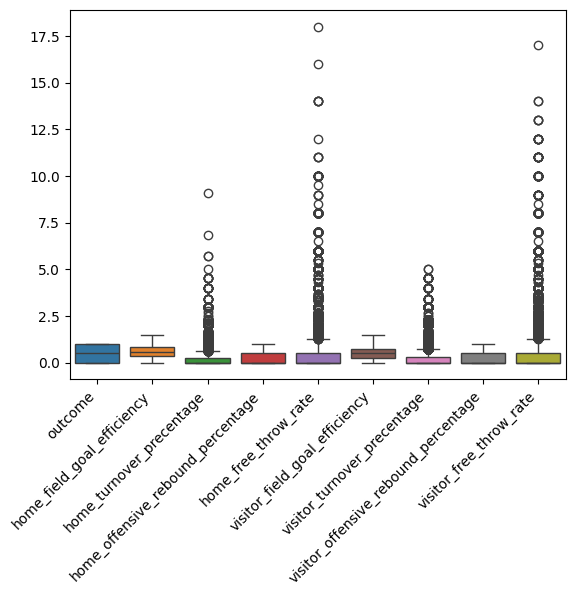

In [26]:
# Creating a box plot to check for the outliers.

sns.boxplot(data=df[['outcome', 'home_field_goal_efficiency', 'home_turnover_precentage',
       'home_offensive_rebound_percentage', 'home_free_throw_rate',
       'visitor_field_goal_efficiency', 'visitor_turnover_precentage',
       'visitor_offensive_rebound_percentage', 'visitor_free_throw_rate']])
plt.xticks(rotation=45, ha='right')
plt.show()

In [27]:
# Creating a new column by concatenating home players and forming an array representing the home lineup.
df['home_lineup'] = df.apply(lambda row: (row['home_0'], row['home_1'], row['home_2'], row['home_3'], row['home_4']), axis=1)
df.head()

,season,home_team,away_team,home_0,home_1,home_2,home_3,home_4,away_0,away_1,...,outcome,home_field_goal_efficiency,home_turnover_precentage,home_offensive_rebound_percentage,home_free_throw_rate,visitor_field_goal_efficiency,visitor_turnover_precentage,visitor_offensive_rebound_percentage,visitor_free_throw_rate,home_lineup
1,2012,DAL,DEN,77,175,193,329,712,50,149,...,0.0,0.750000,0.000000,0.0,0.0,1.250000,0.00,0.00,0.0,"(77, 175, 193, 329, 712)"
2,2012,DAL,DEN,77,175,193,329,712,26,149,...,0.0,0.375000,0.000000,0.0,0.0,0.625000,0.25,0.50,0.0,"(77, 175, 193, 329, 712)"
3,2012,DAL,DEN,77,175,329,444,712,6,26,...,0.0,0.500000,0.333333,0.0,0.0,0.625000,0.00,0.00,1.0,"(77, 175, 329, 444, 712)"
4,2012,DAL,DEN,175,278,329,444,712,6,26,...,0.0,0.750000,0.000000,0.0,0.0,1.500000,0.00,0.00,0.0,"(175, 278, 329, 444, 712)"
5,2012,DAL,DEN,193,329,444,599,639,6,26,...,0.0,0.916667,0.155280,0.0,0.2,0.555556,0.00,0.75,0.0,"(193, 329, 444, 599, 639)"


In [28]:
# Creating a new column by concatenating away players and forming an array representing the away lineup.
df['away_lineup'] = df.apply(lambda row: (row['away_0'], row['away_1'], row['away_2'], row['away_3'], row['away_4']), axis=1)

In [29]:
df.head()

,season,home_team,away_team,home_0,home_1,home_2,home_3,home_4,away_0,away_1,...,home_field_goal_efficiency,home_turnover_precentage,home_offensive_rebound_percentage,home_free_throw_rate,visitor_field_goal_efficiency,visitor_turnover_precentage,visitor_offensive_rebound_percentage,visitor_free_throw_rate,home_lineup,away_lineup
1,2012,DAL,DEN,77,175,193,329,712,50,149,...,0.750000,0.000000,0.0,0.0,1.250000,0.00,0.00,0.0,"(77, 175, 193, 329, 712)","(50, 149, 534, 673, 696)"
2,2012,DAL,DEN,77,175,193,329,712,26,149,...,0.375000,0.000000,0.0,0.0,0.625000,0.25,0.50,0.0,"(77, 175, 193, 329, 712)","(26, 149, 534, 673, 696)"
3,2012,DAL,DEN,77,175,329,444,712,6,26,...,0.500000,0.333333,0.0,0.0,0.625000,0.00,0.00,1.0,"(77, 175, 329, 444, 712)","(6, 26, 149, 534, 696)"
4,2012,DAL,DEN,175,278,329,444,712,6,26,...,0.750000,0.000000,0.0,0.0,1.500000,0.00,0.00,0.0,"(175, 278, 329, 444, 712)","(6, 26, 107, 149, 607)"
5,2012,DAL,DEN,193,329,444,599,639,6,26,...,0.916667,0.155280,0.0,0.2,0.555556,0.00,0.75,0.0,"(193, 329, 444, 599, 639)","(6, 26, 50, 107, 607)"


In [30]:
df.columns

Index(['season', 'home_team', 'away_team', 'home_0', 'home_1', 'home_2',
       'home_3', 'home_4', 'away_0', 'away_1', 'away_2', 'away_3', 'away_4',
       'outcome', 'home_field_goal_efficiency', 'home_turnover_precentage',
       'home_offensive_rebound_percentage', 'home_free_throw_rate',
       'visitor_field_goal_efficiency', 'visitor_turnover_precentage',
       'visitor_offensive_rebound_percentage', 'visitor_free_throw_rate',
       'home_lineup', 'away_lineup'],
      dtype='object')

# Model for generating embeddings

Tranforming the data to make it ready for the model to generate embeddings

In [31]:
# Stacking the arrays along axis=1 to make them understandable by neural network.
array = np.stack(df['home_lineup'])
home_array = [', '.join(map(str, row)) for row in array]

# Defining the home lineups in X_home which will then be used to generate embeddings for each home player.
X_home= [[int(x) for x in row.split(', ')] for row in home_array]
X_home = np.array(X_home)

array = np.stack(df['away_lineup'])
away_array = [', '.join(map(str, row)) for row in array]

# Defining the away lineups in X_away which will then be used to generate embeddings for each away player.
X_away= [[int(x) for x in row.split(', ')] for row in away_array]
X_away = np.array(X_away)

# Defining the target variable which is the outcome of the game.
y=df['outcome']

In [32]:
# Defining the statistics for home and away lineups in X_stats.
X_stats=df[[ 'home_field_goal_efficiency', 'home_turnover_precentage',
       'home_offensive_rebound_percentage', 'home_free_throw_rate','visitor_field_goal_efficiency', 'visitor_turnover_precentage',
       'visitor_offensive_rebound_percentage', 'visitor_free_throw_rate']]

In [33]:
# Importing the necesary libraries for model building.
from keras.models import Model
from keras.layers import Input, Concatenate, Embedding, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

num_stats=8 # We have four stats for home and four stats for away teams.

home_player_comb_input = Input(shape=(5,)) # Since the combinations are of 5 players.
away_player_comb_input = Input(shape=(5,))
stats_input = Input(shape=(num_stats,))  # Assuming num_stats is the number of stats per combination.

# Adding the embedding layer for home player combinations
home_player_embedding_layer = Embedding(input_dim=player_vocab_size, output_dim=32, name='home_embedding')(home_player_comb_input)
flattened_home_player_embedding = Flatten()(home_player_embedding_layer)

# Adding embedding layer for away player combinations.
away_player_embedding_layer = Embedding(input_dim=player_vocab_size, output_dim=32, name='away_embedding')(away_player_comb_input)
flattened_away_player_embedding = Flatten()(away_player_embedding_layer)

# Concatenating the flattened player embeddings with stats input.
concatenated_features = Concatenate()([flattened_home_player_embedding, flattened_away_player_embedding, stats_input])

# Adding dense layers for further processing.
hidden_layer = Dense(32, activation='relu')(concatenated_features)

output_layer = Dense(1, activation='sigmoid')(hidden_layer)

# Defining the model
model = Model(inputs=[home_player_comb_input, away_player_comb_input, stats_input], outputs=output_layer)

# Defining the initial learning rate.
initial_learning_rate = 0.001
opt = Adam(learning_rate=initial_learning_rate)

# Defining loss function as binary_crossentropy sice the target variable is binary.
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Define learning rate scheduler to automatically change the learning rate by monitoring the validation loss.
change_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)

# Defining early stopping criteria in order to avoid overfitting.
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Printing model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ home_embedding      │ (None, 5, 32)     │     23,456 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ away_embedding      │ (None, 5, 32)     │     23,456 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 160)       │          0 │ home_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 160)       │          0 │ away_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 328)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │     10,528 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         33 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 57,473 (224.50 KB)

 Trainable params: 57,473 (224.50 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# # Training the model with learning rate schedule.
home_history = model.fit([X_home, X_away, X_stats], y, epochs=50, batch_size=32, validation_split=0.2,callbacks=[change_lr, early_stop])

Epoch 1/50
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8310 - loss: 0.3805 - val_accuracy: 0.8390 - val_loss: 0.3663 - learning_rate: 0.0010
Epoch 2/50
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8856 - loss: 0.2606 - val_accuracy: 0.8621 - val_loss: 0.3302 - learning_rate: 0.0010
Epoch 3/50
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8988 - loss: 0.2351 - val_accuracy: 0.8631 - val_loss: 0.3286 - learning_rate: 0.0010
Epoch 4/50
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9092 - loss: 0.2135 - val_accuracy: 0.8579 - val_loss: 0.3357 - learning_rate: 0.0010
Epoch 5/50
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9233 - loss: 0.1871 - val_accuracy: 0.8751 - val_loss: 0.3090 - learning_rate: 0.0010
Epoch 6/50
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9305 - loss: 0.1710 - val_accuracy: 0.8816 - val_loss: 0.3020 - learning_rate: 0.0010
Epoch 7/50
3167/3167 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9409 - l

In [35]:
# Storing the weights which are the 32-dimensional feature vectors for the home players in the dictionary.
home_weights=model.get_layer('home_embedding').get_weights()[0]
home_player_weights = {index: array for index, array in enumerate(home_weights)}
print(home_player_weights)

{0: array([ 0.02301159,  0.00213272, -0.02224251,  0.1434626 , -0.06194969,
       -0.02061596,  0.08006635,  0.05495836, -0.00791653, -0.06403862,
       -0.06947241, -0.13117918,  0.16297275,  0.02272666,  0.03750004,
       -0.05814932, -0.01607371, -0.00789478,  0.01043426, -0.18591225,
       -0.06959581,  0.15071937, -0.20994155, -0.12889889,  0.15491796,
        0.1493736 ,  0.11810586,  0.06755178, -0.00317452,  0.01152722,
       -0.13834867,  0.01898733], dtype=float32), 1: array([ 0.12113451, -0.06516575,  0.02620087,  0.07664402,  0.1017226 ,
        0.04975172,  0.07340341,  0.02272882, -0.05873041, -0.06349718,
       -0.06216295, -0.01334754,  0.05317828,  0.00234723,  0.05718848,
       -0.03507033, -0.1169389 , -0.05494459, -0.07337315,  0.03622102,
        0.11738618,  0.10132702, -0.07972816, -0.00911005, -0.00541139,
       -0.06736425,  0.00666581, -0.04733698, -0.05692689,  0.01263992,
       -0.05558966,  0.00471883], dtype=float32), 2: array([ 0.00249603, -0.185

In [36]:
# Storing the weights which are the 32-dimensional feature vectors for the away players in the dictionary.
away_weights=model.get_layer('away_embedding').get_weights()[0]
# Using dictionary comprehension
away_player_weights = {index: array for index, array in enumerate(away_weights)}

print(away_player_weights)

{0: array([-0.06629717,  0.0899741 ,  0.18673855, -0.05247982, -0.07467651,
       -0.05031714,  0.23929492,  0.12555206,  0.31107393,  0.11613531,
        0.16034505, -0.09493077,  0.09996489, -0.22176303,  0.08269527,
        0.12509221, -0.11005838,  0.0043029 ,  0.18840845, -0.00278033,
       -0.2805638 ,  0.0855789 , -0.04805766, -0.05474431,  0.07987554,
       -0.19276284, -0.15311298,  0.05453257,  0.18341672,  0.00945918,
       -0.00821131,  0.21621   ], dtype=float32), 1: array([-0.16232689, -0.2113679 ,  0.07251148, -0.01081364, -0.00218312,
        0.02705335,  0.00458286,  0.16426419,  0.07243009, -0.050143  ,
        0.07176942, -0.07149579,  0.1585919 , -0.15417515, -0.04167067,
        0.02748367, -0.04785152, -0.09645052,  0.1153832 ,  0.01280076,
        0.07396539,  0.02289837,  0.06732685, -0.0415762 ,  0.04564141,
        0.27621955,  0.11156222, -0.01760613,  0.03402358, -0.03059862,
       -0.00336665,  0.02318743], dtype=float32), 2: array([ 0.03378477,  0.063

In [37]:
# Mapping these 32 dimensional vectors in the datframe.
for col in ['home_0', 'home_1', 'home_2', 'home_3', 'home_4']:
    df[col] = df[col].map(home_player_weights)

In [38]:
for col in ['away_0', 'away_1', 'away_2', 'away_3', 'away_4']:
    df[col] = df[col].map(away_player_weights)

In [39]:
# Preparing the X and y variables for our final classification model to classify embeddings as win or loss.
X = df[['home_0', 'home_1', 'home_2', 'home_3', 'home_4', 'away_0', 'away_1', 'away_2', 'away_3', 'away_4']].values
y = df['outcome'].values
X_flat = np.vstack([np.concatenate(arr) for arr in X])


# Model Building for classifying the embeddings.

# Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Splitting data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Defining the logistic regression model.
lr_model = LogisticRegression(max_iter=10000)

# Performing 5-fold cross_validation.
accuracies = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_model.fit(X_train, y_train)

# Evaluating model performance.
print("Train Score:",np.mean(accuracies))
print("Test Score:",lr_model.score(X_test,y_test))

Train Score: 0.5645853597101803
Test Score: 0.5620731851734891


In [41]:
# Making predictions
y_pred=lr_model.predict(X_test)

In [42]:
from sklearn.metrics import classification_report
# Calculating and printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.53      0.55     12792
         1.0       0.55      0.60      0.58     12541

    accuracy                           0.56     25333
   macro avg       0.56      0.56      0.56     25333
weighted avg       0.56      0.56      0.56     25333



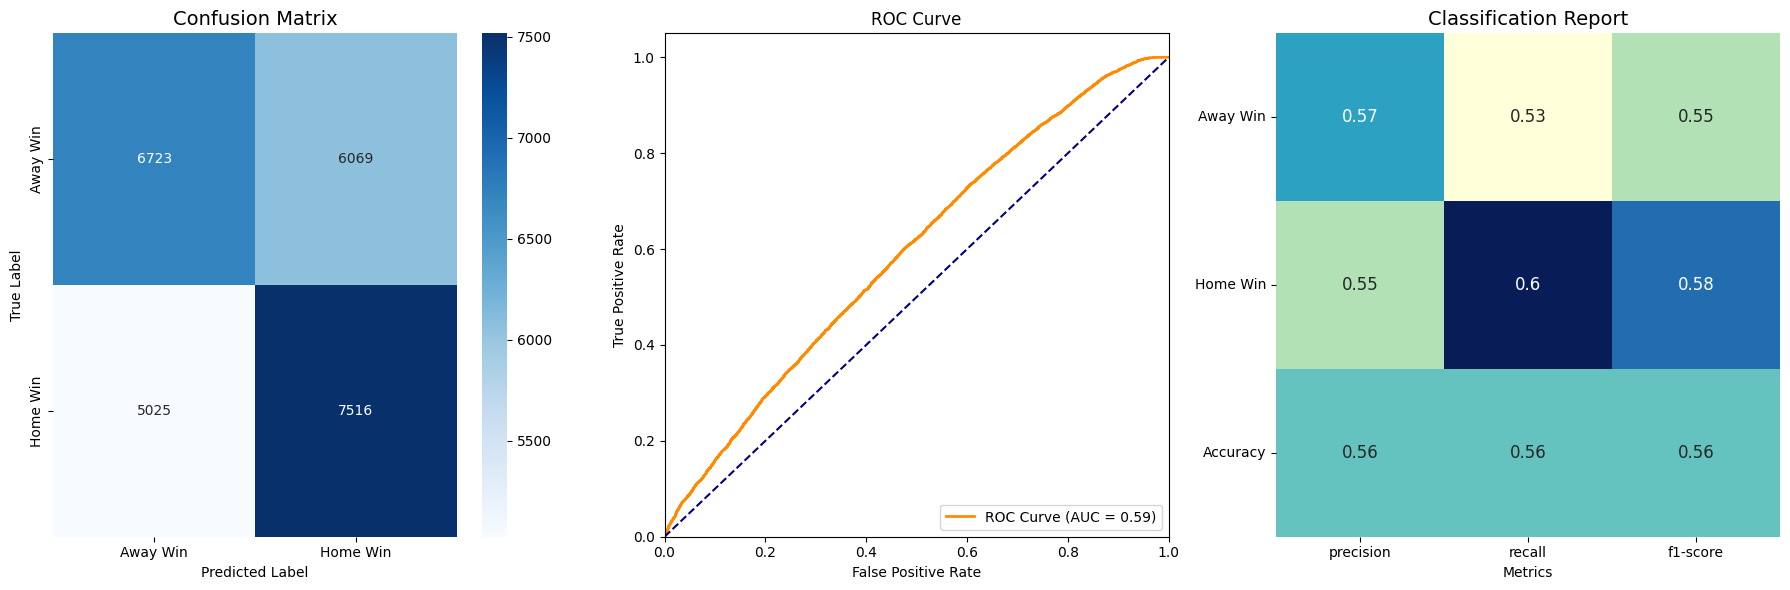

Mean CV Accuracy: 0.565 (±0.001)
Test Set Accuracy: 0.562


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_model_diagnostics(model, X_test, y_test):
    """Create three-panel diagnostic plot for classification models"""
    # Create figure
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    plt.subplots_adjust(wspace=0.3)

    # Generate predictions and probabilities
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # 1. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0],
                xticklabels=['Away Win', 'Home Win'],
                yticklabels=['Away Win', 'Home Win'])
    ax[0].set_title('Confusion Matrix', fontsize=14)
    ax[0].set_xlabel('Predicted Label')
    ax[0].set_ylabel('True Label')

    # 2. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    ax[1].plot(fpr, tpr, color='darkorange', lw=2,
              label=f'ROC Curve (AUC = {roc_auc:.2f})')
    ax[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax[1].set(xlim=[0, 1], ylim=[0, 1.05],
             xlabel='False Positive Rate',
             ylabel='True Positive Rate',
             title='ROC Curve')
    ax[1].legend(loc="lower right")

    # 3. Classification Report Heatmap
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose().round(2)
    report_df = report_df.loc[['0.0', '1.0', 'accuracy'], ['precision', 'recall', 'f1-score']]
    report_df.index = ['Away Win', 'Home Win', 'Accuracy']

    sns.heatmap(report_df, annot=True, cmap='YlGnBu', fmt='g', ax=ax[2],
                cbar=False, annot_kws={'size': 12})
    ax[2].set_title('Classification Report', fontsize=14)
    ax[2].set_xlabel('Metrics')
    ax[2].set_yticklabels(report_df.index, rotation=0)

    plt.tight_layout()
    return fig

# Data splitting and model training
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)
lr_model = LogisticRegression(max_iter=10000)
accuracies = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_model.fit(X_train, y_train)

# Generate and display diagnostics
fig = plot_model_diagnostics(lr_model, X_test, y_test)
plt.show()

# Print performance metrics
print(f"Mean CV Accuracy: {np.mean(accuracies):.3f} (±{np.std(accuracies):.3f})")
print(f"Test Set Accuracy: {lr_model.score(X_test, y_test):.3f}")

# Optional: Save the figure
# plt.savefig('logreg_diagnostics.png', dpi=300, bbox_inches='tight')

# SVM

In [44]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

# Scale the features - crucial for SVM performance
scaler = StandardScaler()
X_flat_scaled = scaler.fit_transform(X_flat)

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X_flat_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Ensure balanced split
)

# Create optimized LinearSVC model
svm_model = LinearSVC(
    dual='auto',          # Let sklearn choose the best solver
    C=1.0,               # Regularization parameter
    max_iter=2000,       # Increase max iterations for convergence
    class_weight='balanced',  # Handle class imbalance
    random_state=42,
    tol=1e-4            # Tolerance for stopping criterion
)

# Train the model
print("Training model...")
svm_model.fit(X_train, y_train)

# Make predictions
print("Making predictions...")
y_pred = svm_model.predict(X_test)

# Print results
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Get feature importances (absolute values of coefficients)
feature_importance = np.abs(svm_model.coef_[0])
top_features = np.argsort(feature_importance)[-5:]  # Get top 5 features
print("\nTop 5 most important features:")
for idx in reversed(top_features):
    print(f"Feature {idx}: {feature_importance[idx]:.4f}")

Training model...
Making predictions...

Accuracy: 0.5710733035961

Detailed Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.53      0.55     12667
         1.0       0.57      0.61      0.59     12666

    accuracy                           0.57     25333
   macro avg       0.57      0.57      0.57     25333
weighted avg       0.57      0.57      0.57     25333


Top 5 most important features:
Feature 139: 0.0631
Feature 13: 0.0494
Feature 107: 0.0434
Feature 158: 0.0421
Feature 132: 0.0380


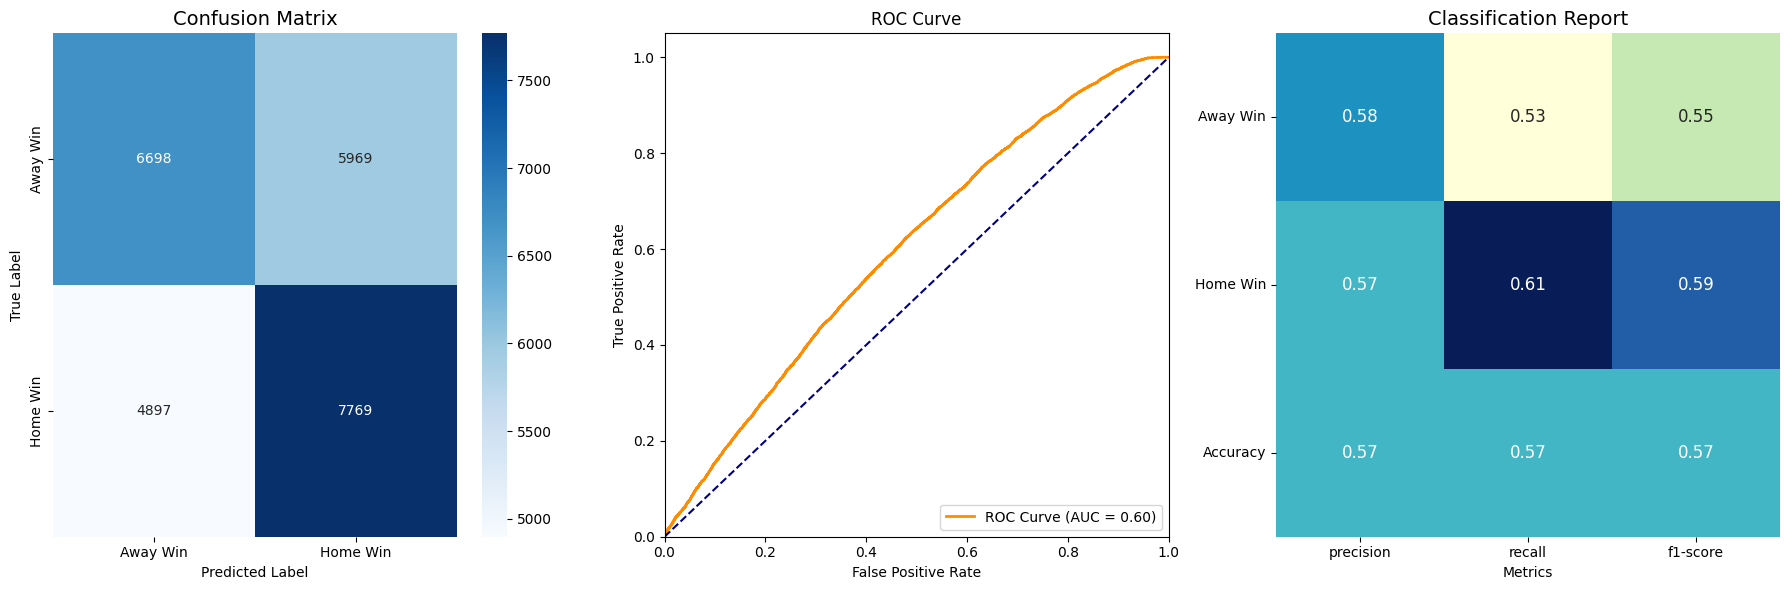

Test Accuracy: 0.571

Top 5 Features:
Feature 139: 0.0631
Feature 13: 0.0494
Feature 107: 0.0434
Feature 158: 0.0421
Feature 132: 0.0380


In [45]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_svm_diagnostics(model, X_test, y_test):
    """Create diagnostic plots for SVM model"""
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    plt.subplots_adjust(wspace=0.3)

    # Generate predictions and decision scores
    y_pred = model.predict(X_test)
    decision_scores = model.decision_function(X_test)

    # 1. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0],
                xticklabels=['Away Win', 'Home Win'],
                yticklabels=['Away Win', 'Home Win'])
    ax[0].set_title('Confusion Matrix', fontsize=14)
    ax[0].set_xlabel('Predicted Label')
    ax[0].set_ylabel('True Label')

    # 2. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, decision_scores)
    roc_auc = auc(fpr, tpr)
    ax[1].plot(fpr, tpr, color='darkorange', lw=2,
              label=f'ROC Curve (AUC = {roc_auc:.2f})')
    ax[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax[1].set(xlim=[0, 1], ylim=[0, 1.05],
             xlabel='False Positive Rate',
             ylabel='True Positive Rate',
             title='ROC Curve')
    ax[1].legend(loc="lower right")

    # 3. Classification Report Heatmap
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose().round(2)
    report_df = report_df.loc[['0.0', '1.0', 'accuracy'], ['precision', 'recall', 'f1-score']]
    report_df.index = ['Away Win', 'Home Win', 'Accuracy']

    sns.heatmap(report_df, annot=True, cmap='YlGnBu', fmt='g', ax=ax[2],
                cbar=False, annot_kws={'size': 12})
    ax[2].set_title('Classification Report', fontsize=14)
    ax[2].set_xlabel('Metrics')
    ax[2].set_yticklabels(report_df.index, rotation=0)

    plt.tight_layout()
    return fig

# Generate and display diagnostics
fig = plot_svm_diagnostics(svm_model, X_test, y_test)
plt.show()

# Print performance summary
print(f"Test Accuracy: {svm_model.score(X_test, y_test):.3f}")
print("\nTop 5 Features:")
feature_importance = np.abs(svm_model.coef_[0])
for idx in np.argsort(feature_importance)[-5:][::-1]:
    print(f"Feature {idx}: {feature_importance[idx]:.4f}")

# Neural Networks

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score

# Scale the features
scaler = StandardScaler()
X_flat_scaled = scaler.fit_transform(X_flat)

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X_flat_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Define a more sophisticated model architecture
model = Sequential([
    # Input layer with batch normalization
    Dense(512, input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Hidden layers with decreasing neurons
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile with a lower initial learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Enhanced callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    verbose=1,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the model with a larger batch size
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr, early_stop, checkpoint],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions and calculate metrics
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate detailed metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print("\nDetailed Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

C:\Users\sahil\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1580/1584 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5207 - loss: 0.7817
Epoch 1: val_accuracy improved from -inf to 0.56764, saving model to best_model.keras
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5208 - loss: 0.7816 - val_accuracy: 0.5676 - val_loss: 0.6666 - learning_rate: 5.0000e-04
Epoch 2/100
1581/1584 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5602 - loss: 0.6753
Epoch 2: val_accuracy improved from 0.56764 to 0.58007, saving model to best_model.keras
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5602 - loss: 0.6753 - val_accuracy: 0.5801 - val_loss: 0.6612 - learning_rate: 5.0000e-04
Epoch 3/100
1579/1584 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5764 - loss: 0.6645
Epoch 3: val_accuracy improved from 0.58007 to 0.58256, saving model to best_model.keras
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5764 - loss: 0.6645 - val_accuracy: 0.5826 - val_loss: 0.6582 - learning_rate: 5.0000e-04
Epoch 4/100
1581/1584

792/792 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


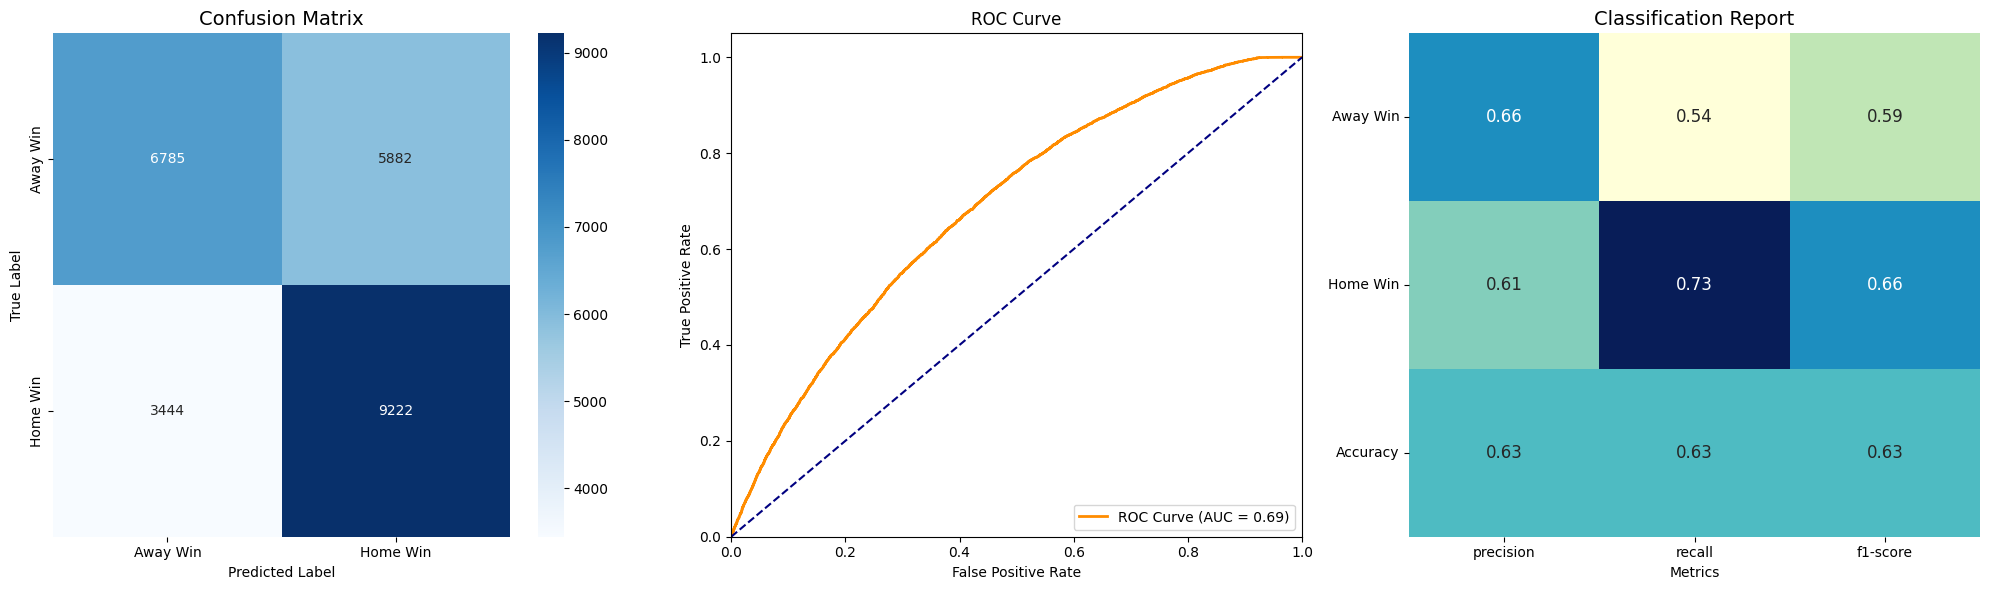

In [47]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_nn_diagnostics(model, X_test, y_test):
    # Create figure
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))
    plt.subplots_adjust(wspace=0.3)

    # Generate predictions
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)

    # 1. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0],
                xticklabels=['Away Win', 'Home Win'],
                yticklabels=['Away Win', 'Home Win'])
    ax[0].set_title('Confusion Matrix', fontsize=14)
    ax[0].set_xlabel('Predicted Label')
    ax[0].set_ylabel('True Label')

    # 2. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    ax[1].plot(fpr, tpr, color='darkorange', lw=2,
              label=f'ROC Curve (AUC = {roc_auc:.2f})')
    ax[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax[1].set(xlim=[0, 1], ylim=[0, 1.05],
             xlabel='False Positive Rate',
             ylabel='True Positive Rate',
             title='ROC Curve')
    ax[1].legend(loc="lower right")

    # 3. Classification Report Heatmap
    report = classification_report(y_test, y_pred_classes, output_dict=True)
    report_df = pd.DataFrame(report).transpose().round(2)
    report_df = report_df.loc[['0.0', '1.0', 'accuracy'], ['precision', 'recall', 'f1-score']]
    report_df.index = ['Away Win', 'Home Win', 'Accuracy']

    sns.heatmap(report_df, annot=True, cmap='YlGnBu', fmt='g', ax=ax[2],
                cbar=False, annot_kws={'size': 12})
    ax[2].set_title('Classification Report', fontsize=14)
    ax[2].set_xlabel('Metrics')
    ax[2].set_yticklabels(report_df.index, rotation=0)

    plt.tight_layout()
    return fig

# Generate and display plots after model evaluation
fig = plot_nn_diagnostics(model, X_test, y_test)
plt.show()

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale features - this is important but not computationally heavy
scaler = StandardScaler()
X_flat_scaled = scaler.fit_transform(X_flat)

# Stratified split to handle class imbalance
X_train, X_test, y_train, y_test = train_test_split(
    X_flat_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Create a more efficient but improved model
rf_model = RandomForestClassifier(
    n_estimators=100,        # Moderate number of trees
    max_depth=15,           # Reasonable depth
    min_samples_split=10,   # Balanced value
    min_samples_leaf=4,     # Balanced value
    max_features='sqrt',    # Reduces feature consideration at each split
    n_jobs=2,              # Use only 2 CPU cores to prevent freezing
    class_weight='balanced', # Handle class imbalance
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)

# Print results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get top 5 feature importances (limited to save memory)
feature_importance = rf_model.feature_importances_
top_features = np.argsort(feature_importance)[-5:]
print("\nTop 5 most important features:")
for idx in reversed(top_features):
    print(f"Feature {idx}: {feature_importance[idx]:.4f}")

Accuracy: 0.6613508072474638

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.46      0.58     12667
         1.0       0.62      0.86      0.72     12666

    accuracy                           0.66     25333
   macro avg       0.69      0.66      0.65     25333
weighted avg       0.69      0.66      0.65     25333


Top 5 most important features:
Feature 139: 0.0095
Feature 132: 0.0092
Feature 107: 0.0086
Feature 142: 0.0073
Feature 134: 0.0071


In [49]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# Calculating and printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.46      0.58     12667
         1.0       0.62      0.86      0.72     12666

    accuracy                           0.66     25333
   macro avg       0.69      0.66      0.65     25333
weighted avg       0.69      0.66      0.65     25333



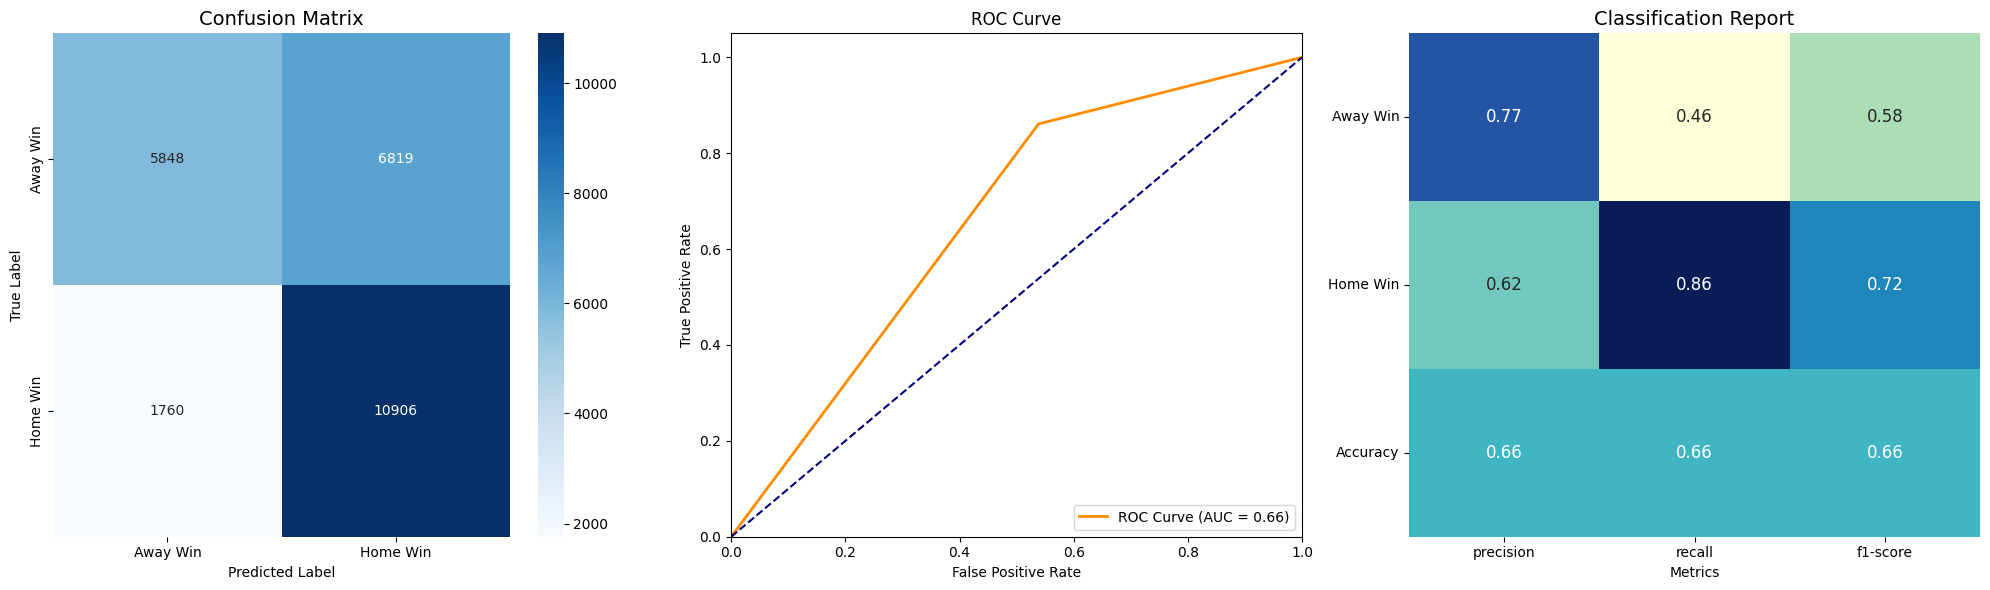

In [50]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_rf_diagnostics(model, X_test, y_test):
    """Create diagnostic plots for Random Forest model"""
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))
    plt.subplots_adjust(wspace=0.3)

    # Generate predictions and probabilities
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # 1. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0],
                xticklabels=['Away Win', 'Home Win'],
                yticklabels=['Away Win', 'Home Win'])
    ax[0].set_title('Confusion Matrix', fontsize=14)
    ax[0].set_xlabel('Predicted Label')
    ax[0].set_ylabel('True Label')

    # 2. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    ax[1].plot(fpr, tpr, color='darkorange', lw=2,
              label=f'ROC Curve (AUC = {roc_auc:.2f})')
    ax[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax[1].set(xlim=[0, 1], ylim=[0, 1.05],
             xlabel='False Positive Rate',
             ylabel='True Positive Rate',
             title='ROC Curve')
    ax[1].legend(loc="lower right")

    # 3. Classification Report Heatmap
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose().round(2)
    report_df = report_df.loc[['0.0', '1.0', 'accuracy'], ['precision', 'recall', 'f1-score']]
    report_df.index = ['Away Win', 'Home Win', 'Accuracy']

    sns.heatmap(report_df, annot=True, cmap='YlGnBu', fmt='g', ax=ax[2],
                cbar=False, annot_kws={'size': 12})
    ax[2].set_title('Classification Report', fontsize=14)
    ax[2].set_xlabel('Metrics')
    ax[2].set_yticklabels(report_df.index, rotation=0)

    plt.tight_layout()
    return fig

# Generate and display plots after model evaluation
fig = plot_rf_diagnostics(rf_model, X_test, y_test)
plt.show()

# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.decomposition import PCA

# Scale the features - crucial for distance-based algorithms
print("Scaling features...")
scaler = StandardScaler()
X_flat_scaled = scaler.fit_transform(X_flat)

# Apply PCA to reduce dimensionality while preserving 95% of variance
print("Applying PCA...")
pca = PCA(n_components=0.95, random_state=42)
X_flat_reduced = pca.fit_transform(X_flat_scaled)
print(f"Reduced dimensions from {X_flat_scaled.shape[1]} to {X_flat_reduced.shape[1]} features")

# Split the reduced data
X_train, X_test, y_train, y_test = train_test_split(
    X_flat_reduced,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Create optimized KNN classifier
knn_classifier = KNeighborsClassifier(
    n_neighbors=5,           # Odd number to avoid ties
    weights='distance',      # Weight points by distance
    metric='cosine',        # Cosine similarity often works well for high-dim data
    n_jobs=2,               # Parallel processing but not too intensive
    leaf_size=30            # Optimal for cosine distance
)

# Perform quick cross-validation
print("\nPerforming cross-validation...")
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=3, n_jobs=2)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Train the final model
print("\nTraining final model...")
knn_classifier.fit(X_train, y_train)

# Make predictions
print("Making predictions...")
y_pred = knn_classifier.predict(X_test)

# Calculate and print metrics
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate predictions probabilities
y_pred_proba = knn_classifier.predict_proba(X_test)

# Print confidence metrics
print("\nPrediction Confidence Analysis:")
confidence_scores = np.max(y_pred_proba, axis=1)
print(f"Mean confidence: {confidence_scores.mean():.3f}")
print(f"Min confidence: {confidence_scores.min():.3f}")
print(f"Max confidence: {confidence_scores.max():.3f}")

Scaling features...
Applying PCA...
Reduced dimensions from 320 to 247 features

Performing cross-validation...
Cross-validation scores: [0.66139681 0.66275868 0.6578737 ]
Mean CV accuracy: 0.661 (+/- 0.004)

Training final model...
Making predictions...

Model Evaluation:
Accuracy: 0.6984565586389294

Detailed Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.57      0.65     12667
         1.0       0.66      0.83      0.73     12666

    accuracy                           0.70     25333
   macro avg       0.71      0.70      0.69     25333
weighted avg       0.71      0.70      0.69     25333


Prediction Confidence Analysis:
Mean confidence: 0.850
Min confidence: 0.500
Max confidence: 1.000


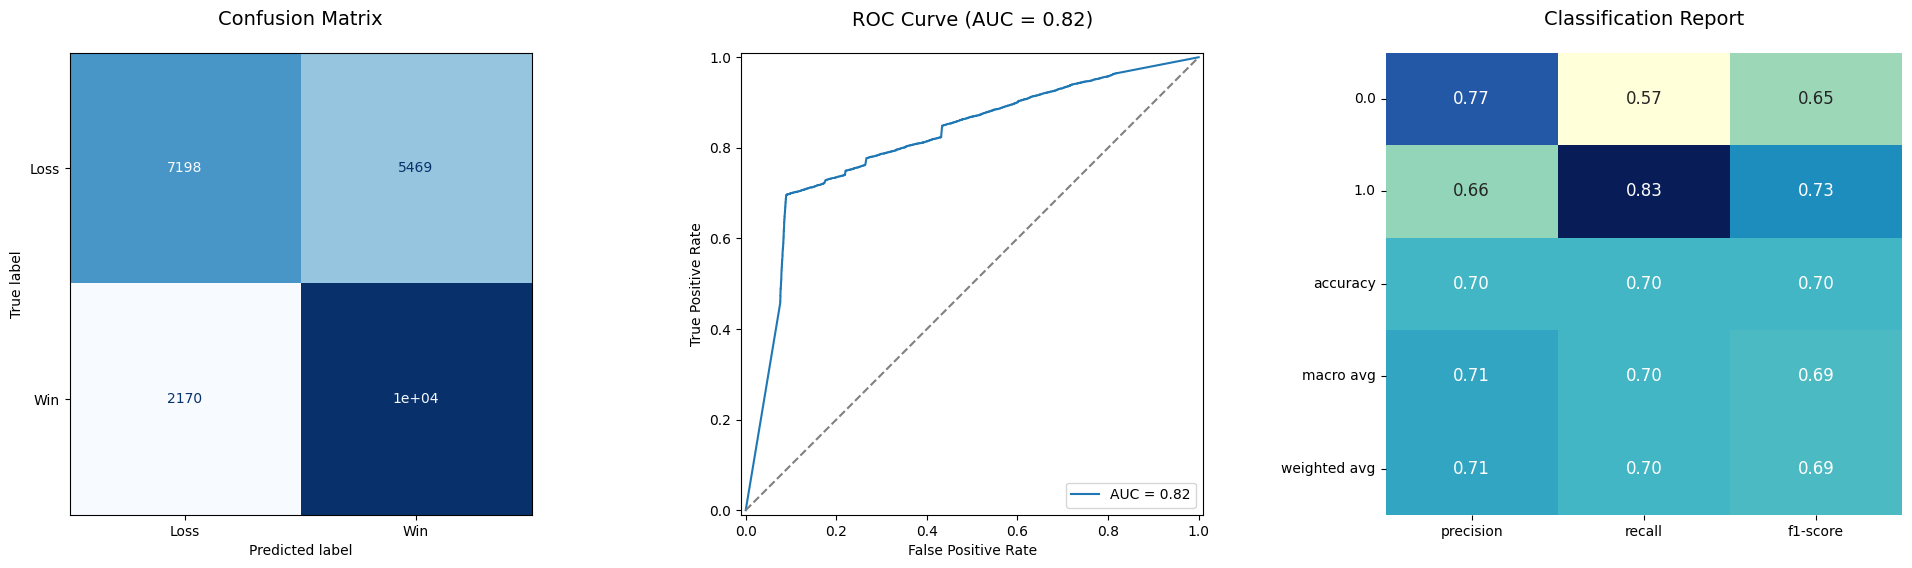

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report
from sklearn.metrics import roc_curve, auc

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
plt.subplots_adjust(wspace=0.3)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Loss', 'Win'])
disp.plot(cmap='Blues', ax=ax[0], colorbar=False)
ax[0].set_title('Confusion Matrix', fontsize=14, pad=20)
ax[0].grid(False)

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot(ax=ax[1], color='#1f77b4')
ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[1].set_title('ROC Curve (AUC = {:.2f})'.format(roc_auc), fontsize=14, pad=20)

# 3. Classification Report Heatmap
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :].T  # Exclude 'support'

# Get the original index labels (class names, 'accuracy', etc.)
original_labels = report_df.index.tolist()

sns.heatmap(report_df, annot=True, cmap='YlGnBu', fmt='.2f',
           cbar=False, ax=ax[2], annot_kws={'size': 12})
ax[2].set_title('Classification Report', fontsize=14, pad=20)

# Set y-tick labels using the original labels
ax[2].set_yticklabels(original_labels, rotation=0)

# Save and display
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
plt.show()

# Defining test case

Since the KNN gave us the best results till now we will consider it to perform lineup suggestion.

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

def load_and_validate_data(file_path):
    """Load data and perform basic validation."""
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        raise Exception(f"Error loading data: {str(e)}")

def get_team_players(input_dataset, away_team, home_team, season):
    """Extract players for given teams and season with validation."""
    away_team_data = input_dataset[(input_dataset['away_team'] == away_team) & (input_dataset['season'] == season)]
    home_team_data = input_dataset[(input_dataset['home_team'] == home_team) & (input_dataset['season'] == season)]

    if away_team_data.empty or home_team_data.empty:
        raise ValueError(f"No data found for {away_team} vs {home_team} in season {season}")

    away_players = away_team_data[['away_1', 'away_2', 'away_3', 'away_0', 'away_4']].values.flatten()
    home_players = home_team_data[['home_1', 'home_2', 'home_3', 'home_0', 'home_4']].values.flatten()

    return pd.unique(away_players), pd.unique(home_players)

def prepare_player_embeddings(players, player_mapping, player_weights):
    """Prepare player embeddings with error checking."""
    embeddings = []
    for player in players:
        player_code = player_mapping.get(player)
        if player_code is None:
            # Player statistics not available in existing training dataset
            raise ValueError(f"Player not found in mapping: {player}")

        embedding = player_weights.get(player_code)
        if embedding is None:
            raise ValueError(f"No embedding found for player: {player}")

        embeddings.append(embedding)
    return embeddings

def find_candidate_players(all_players, selected_players, player_mapping, player_weights):
    """Find and validate candidate players for lineup."""
    remaining_players = list(set(all_players) - set(selected_players))
    candidate_embeddings = []
    candidate_codes = []

    for player in remaining_players:
        code = player_mapping.get(player)
        if code is not None:
            embedding = player_weights.get(code)
            if embedding is not None:
                candidate_embeddings.append(embedding)
                candidate_codes.append(code)

    return candidate_embeddings, candidate_codes

def prepare_prediction_data(home_embeddings, away_embeddings, candidate_embeddings):
    """Prepare data for model prediction with shape validation."""
    X_input = []
    for candidate in candidate_embeddings:
        combined = home_embeddings + away_embeddings + [candidate]
        X_input.append(np.concatenate(combined))

    X_input_flat = np.vstack(X_input)
    expected_shape = len(home_embeddings[0]) * len(home_embeddings) + \
                    len(away_embeddings[0]) * len(away_embeddings) + \
                    len(candidate_embeddings[0])

    if X_input_flat.shape[1] != expected_shape:
        raise ValueError(f"Incorrect feature dimension. Expected {expected_shape}, got {X_input_flat.shape[1]}")

    return X_input_flat

def predict_lineup(X_input_flat, scaler, pca, knn_classifier):
    """Make predictions using the trained model components."""
    try:
        X_scaled = scaler.transform(X_input_flat)
        X_reduced = pca.transform(X_scaled)
        predictions = knn_classifier.predict(X_reduced)
        probabilities = knn_classifier.predict_proba(X_reduced)
        return predictions, probabilities
    except Exception as e:
        raise Exception(f"Error during prediction: {str(e)}")

def main_prediction_pipeline(
    data_path,
    away_team,
    home_team,
    season,
    away_players_selected,
    home_players_selected,
    away_player_mapping,
    home_player_mapping,
    away_player_weights,
    home_player_weights,
    scaler,
    pca,
    knn_classifier
):
    """Main prediction pipeline with full error handling."""
    try:
        # Load and validate data
        test_dataset = load_and_validate_data(data_path)

        # Get team players
        all_away_players, all_home_players = get_team_players(test_dataset, away_team, home_team, season)

        all_away_players = [player for player in all_away_players if player in away_player_mapping]
        all_home_players = [player for player in all_home_players if player in home_player_mapping]
        print("Pool of available players:\n", all_home_players)

        # Prepare embeddings for selected players
        away_embeddings = prepare_player_embeddings(
            away_players_selected, away_player_mapping, away_player_weights)
        home_embeddings = prepare_player_embeddings(
            home_players_selected, home_player_mapping, home_player_weights)

        # Find candidate players
        candidate_embeddings, candidate_codes = find_candidate_players(
            all_home_players, home_players_selected, home_player_mapping, home_player_weights)

        # Prepare prediction data
        X_input_flat = prepare_prediction_data(
            home_embeddings, away_embeddings, candidate_embeddings)

        # Make predictions
        predictions, probabilities = predict_lineup(
            X_input_flat, scaler, pca, knn_classifier)

        # Process results
        results = []
        for i, code in enumerate(candidate_codes):
            if predictions[i] == 0:  # Away team wins
                player_name = next(
                    (name for name, value in home_player_mapping.items() if value == code), None)
                if player_name:
                    results.append({
                        'player_name': player_name,
                        'win_probability': probabilities[i][0]
                    })

        # Sort results
        results.sort(key=lambda x: x['win_probability'], reverse=True)
        return results

    except Exception as e:
        raise Exception(f"Error in prediction pipeline: {str(e)}")

def display_results(results):
    """Display formatted prediction results."""
    print("\nPotential 5th players for home team win (sorted by probability):")
    print("-" * 60)
    print(f"{'Player Name':<30} {'Win Probability':<15}")
    print("-" * 60)

    for result in results[:5]:    # Limit results to top 5 players
        print(f"{result['player_name']:<30} {result['win_probability']:.4f}")

    print("-" * 60)

In [56]:
try:
    results = main_prediction_pipeline(
        data_path="datasets/input.csv",
        away_team="ORL",
        home_team="NYK",
        season=2015,
        # away_players_selected=['Channing Frye', 'Evan Fournier', 'Nikola Vucevic', 'Tobias Harris', 'Victor Oladipo'],
        away_players_selected=['Draymond Green', 'Festus Ezeli', 'Harrison Barnes', 'Klay Thompson', 'Stephen Curry'],
        # home_players_selected=['Carmelo Anthony', 'Jason Smith', 'Lance Thomas', 'Langston Galloway'],
        home_players_selected=['Ben McLemore', 'Darren Collison', 'DeMarcus Cousins', 'Jason Thompson'],
        away_player_mapping=player_name_mapping,
        home_player_mapping=player_name_mapping,
        away_player_weights=away_player_weights,
        home_player_weights=home_player_weights,
        scaler=scaler,
        pca=pca,
        knn_classifier=knn_classifier
    )

    display_results(results)

except Exception as e:
    print(f"Error: {str(e)}")

Pool of available players:
 ['Jose Calderon', 'Lance Thomas', 'Langston Galloway', 'Jason Smith', 'Lou Amundson', "Amar'e Stoudemire", 'Tim Hardaway', 'Shane Larkin', 'Quincy Acy', 'Travis Wear', 'Cole Aldrich', 'Cleanthony Early', 'Andrea Bargnani', 'Ricky Ledo', 'Carmelo Anthony', 'Pablo Prigioni', 'Samuel Dalembert', 'Alexey Shved', 'Iman Shumpert', 'J.R. Smith']

Potential 5th players for home team win (sorted by probability):
------------------------------------------------------------
Player Name                    Win Probability
------------------------------------------------------------
Jason Smith                    0.5932
Langston Galloway              0.5920
------------------------------------------------------------
